## CNN网络结构图示

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST数据库

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("../MNIST_data/", one_hot=False)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [13]:

learning_rate = 0.001 
num_steps = 2000
batch_size = 64

num_input = 784 # img shape: 28*28
num_classes = 10 # 0-9 digits
dropout = 0.75

In [14]:
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    with tf.variable_scope('ConvNet', reuse=reuse):

        x = x_dict['images']

        # (batch * height * weight * channel)
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # 32 5*5 kernels
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        fc1 = tf.contrib.layers.flatten(conv2)
        fc1 = tf.layers.dense(fc1, 1024)
        
        # open if training, close if testing
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # output layer
        out = tf.layers.dense(fc1, n_classes)

    return out

In [15]:
def model_fn(features, labels, mode):
    
    # because dropout is different for train and test
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 

    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators need return EstimatorSpec
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [16]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/m8/61gf4jkx08n8b3346gsz7jk80000gn/T/tmpa71nm37n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1346bac88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/m8/61gf4jkx08n8b3346gsz7jk80000gn/T/tmpa71nm37n/model.ckpt.
INFO:tensorflow:loss = 2.307776, step = 1
INFO:tensorflow:global_step/sec: 35.433
INFO:tensorflow:loss = 0.2265311, step = 101 (2.823 sec)
INFO:tensorflow:global_step/sec: 36.3005
INFO:tensorflow:loss = 0.2139054, step = 201 (2.755 sec)
INFO:tensorflow:global_step/sec: 36.1788
INFO:tensorflow:loss = 0.046962794, step = 301 (2.764 sec)
INFO:tensorflow:global_step/sec: 35.8411
INFO:tensorflow:loss = 0.19688067, step = 401 (2.790 sec)
INFO:tensorflow:global_step/sec: 36.0945
INFO:tensorflow:loss = 0.12527245, step = 501 (2.771 sec)
INFO:tensorflow:global_step/sec: 36.5731
INFO:tensorflow:loss = 0.06315669, step = 601 (2.734 sec)
INFO:tenso

In [18]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-12-21:44:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/m8/61gf4jkx08n8b3346gsz7jk80000gn/T/tmpa71nm37n/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-12-21:44:14
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.99, global_step = 2000, loss = 0.03722541


{'accuracy': 0.99, 'loss': 0.03722541, 'global_step': 2000}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/m8/61gf4jkx08n8b3346gsz7jk80000gn/T/tmpa71nm37n/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


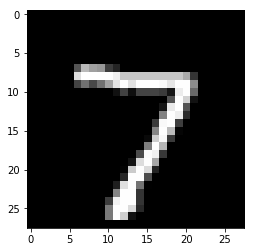

Model prediction: 7


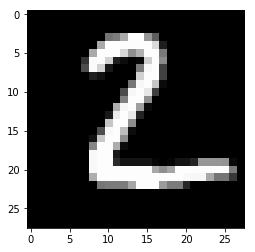

Model prediction: 2


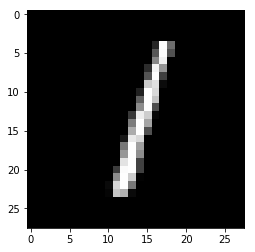

Model prediction: 1


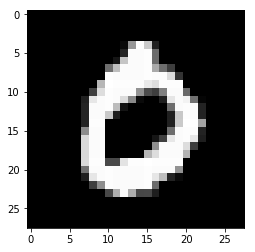

Model prediction: 0


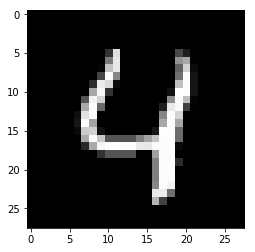

Model prediction: 4


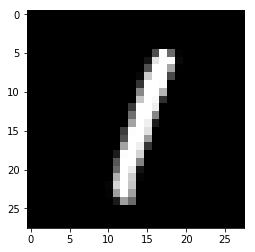

Model prediction: 1


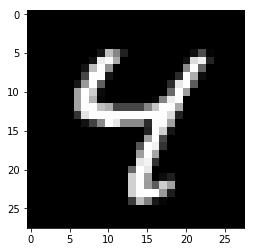

Model prediction: 4


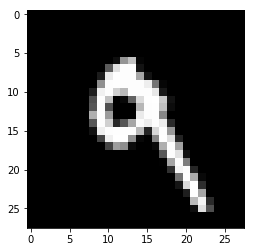

Model prediction: 9


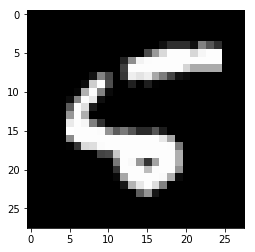

Model prediction: 5


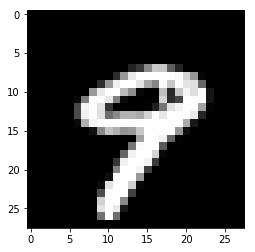

Model prediction: 9


In [22]:
n_images = 10

test_images = mnist.test.images[:n_images]

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)

preds = list(model.predict(input_fn))

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])